In [34]:
!pip install yfinance

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from matplotlib import pyplot as plt

In [114]:
# Λήψη δεδομένων μετοχής από το yfinance
symbol = 'AAPL'  # Παράδειγμα με μετοχή Apple
start_date = '2018-01-01'
end_date = '2023-11-30'
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [115]:
# Επιλογή τιμής κλεισίματος ως χαρακτηριστικό
features = data[['Close']]


In [116]:
# Κλιμακοποίηση των χαρακτηριστικών στο εύρος [0, 1]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [117]:
# Δημιουργία συνόλων εκπαίδευσης και ελέγχου
X, y = [], []
look_back = 20
for i in range(len(features_scaled) - look_back):
    X.append(features_scaled[i:i+look_back])
    y.append(features_scaled[i+look_back])

In [118]:
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Δημιουργία και εκπαίδευση του μοντέλου νευρωνικού δικτύου
model = Sequential()
from tensorflow.keras.layers import Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(units=1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
37/37 [==============================] - 6s 21ms/step - loss: 0.1708
Epoch 2/20
37/37 [==============================] - 1s 19ms/step - loss: 0.0413
Epoch 3/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0343
Epoch 4/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0323
Epoch 5/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0314
Epoch 6/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0297
Epoch 7/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0292
Epoch 8/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0291
Epoch 9/20
37/37 [==============================] - 1s 21ms/step - loss: 0.0284
Epoch 10/20
37/37 [==============================] - 1s 19ms/step - loss: 0.0279
Epoch 11/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0273
Epoch 12/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0267
Epoch 13/20
37/37 [==================

In [120]:

# Προβλέψεις στα δεδομένα ελέγχου
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

10/10 [==============================] - 1s 14ms/step


In [121]:
# Αξιολόγηση του μοντέλου
mse = mean_squared_error(features[-len(y_test):], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5804.836095195052


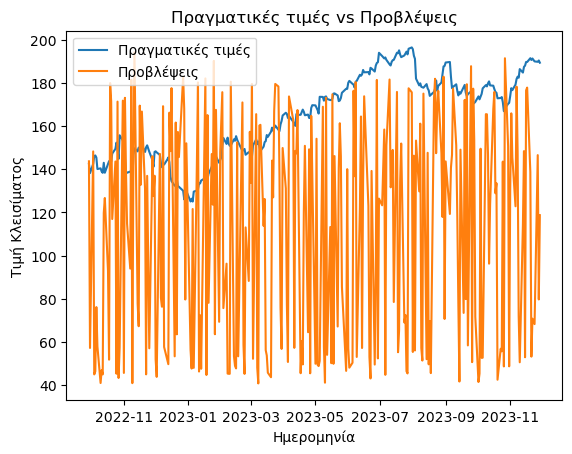

In [122]:
# Παρουσίαση των πραγματικών τιμών και των προβλέψεων
plt.plot(features.index[-len(y_test):], features[-len(y_test):], label='Πραγματικές τιμές')
plt.plot(features.index[-len(y_test):], predictions, label='Προβλέψεις')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.title('Πραγματικές τιμές vs Προβλέψεις')
plt.legend()
plt.show()
